In [1]:
import pandas as pd
import numpy as np
from sklearn import tree 
from sklearn import model_selection
import pydotplus
import graphviz
import io

In [2]:
import os 

os.environ["PATH"] += os.pathsep + 'C:/Users/kumarijy/Downloads/Graphviz2.38/release/bin/'

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [4]:
df.corr()

,id,bone_length,rotting_flesh,hair_length,has_soul
id,1.000000,-0.062759,-0.007539,0.076475,0.100054
bone_length,-0.062759,1.000000,-0.041716,0.353881,0.381675
rotting_flesh,-0.007539,-0.041716,1.000000,-0.220353,-0.132051
hair_length,0.076475,0.353881,-0.220353,1.000000,0.474835
has_soul,0.100054,0.381675,-0.132051,0.474835,1.000000


In [5]:
df.describe()

,id,bone_length,rotting_flesh,hair_length,has_soul
count,371.000000,371.000000,371.000000,371.000000,371.000000
mean,443.676550,0.434160,0.506848,0.529114,0.471392
std,263.222489,0.132833,0.146358,0.169902,0.176129
min,0.000000,0.061032,0.095687,0.134600,0.009402
25%,205.500000,0.340006,0.414812,0.407428,0.348002
50%,458.000000,0.434891,0.501552,0.538642,0.466372
75%,678.500000,0.517223,0.603977,0.647244,0.600610
max,897.000000,0.817001,0.932466,1.000000,0.935721


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 7 columns):
id               371 non-null int64
bone_length      371 non-null float64
rotting_flesh    371 non-null float64
hair_length      371 non-null float64
has_soul         371 non-null float64
color            371 non-null object
type             371 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 17.4+ KB


In [6]:
df= pd.get_dummies(df,columns=['color'])

In [7]:

for i,row in df.iterrows():
    #print(i == 'Ghoul')
    #print(i)
    #print(row['type'])
    type_int=0
    if row['type'] == 'Ghoul':
        type_int=int(1)
    elif row['type'] == 'Goblin':
        type_int=int(2)
    else:
        type_int=int(3)
    df.at[i,'type_int'] = int(type_int)
    #break
df['type_int'] = pd.to_numeric(df['type_int'],downcast='integer')

In [8]:
df.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,type,color_black,color_blood,color_blue,color_clear,color_green,color_white,type_int
0,0,0.354512,0.350839,0.465761,0.781142,Ghoul,0,0,0,1,0,0,1
1,1,0.575560,0.425868,0.531401,0.439899,Goblin,0,0,0,0,1,0,2
2,2,0.467875,0.354330,0.811616,0.791225,Ghoul,1,0,0,0,0,0,1
3,4,0.776652,0.508723,0.636766,0.884464,Ghoul,1,0,0,0,0,0,1
4,5,0.566117,0.875862,0.418594,0.636438,Ghost,0,0,0,0,1,0,3


In [9]:
df[df['has_soul'] > 0.5].groupby('type')['id'].nunique()

type
Ghost     12
Ghoul     97
Goblin    52
Name: id, dtype: int64

In [35]:
df[df['has_soul'] < 0.5].groupby('type')['id'].nunique()

type
Ghost     105
Ghoul      32
Goblin     73
Name: id, dtype: int64

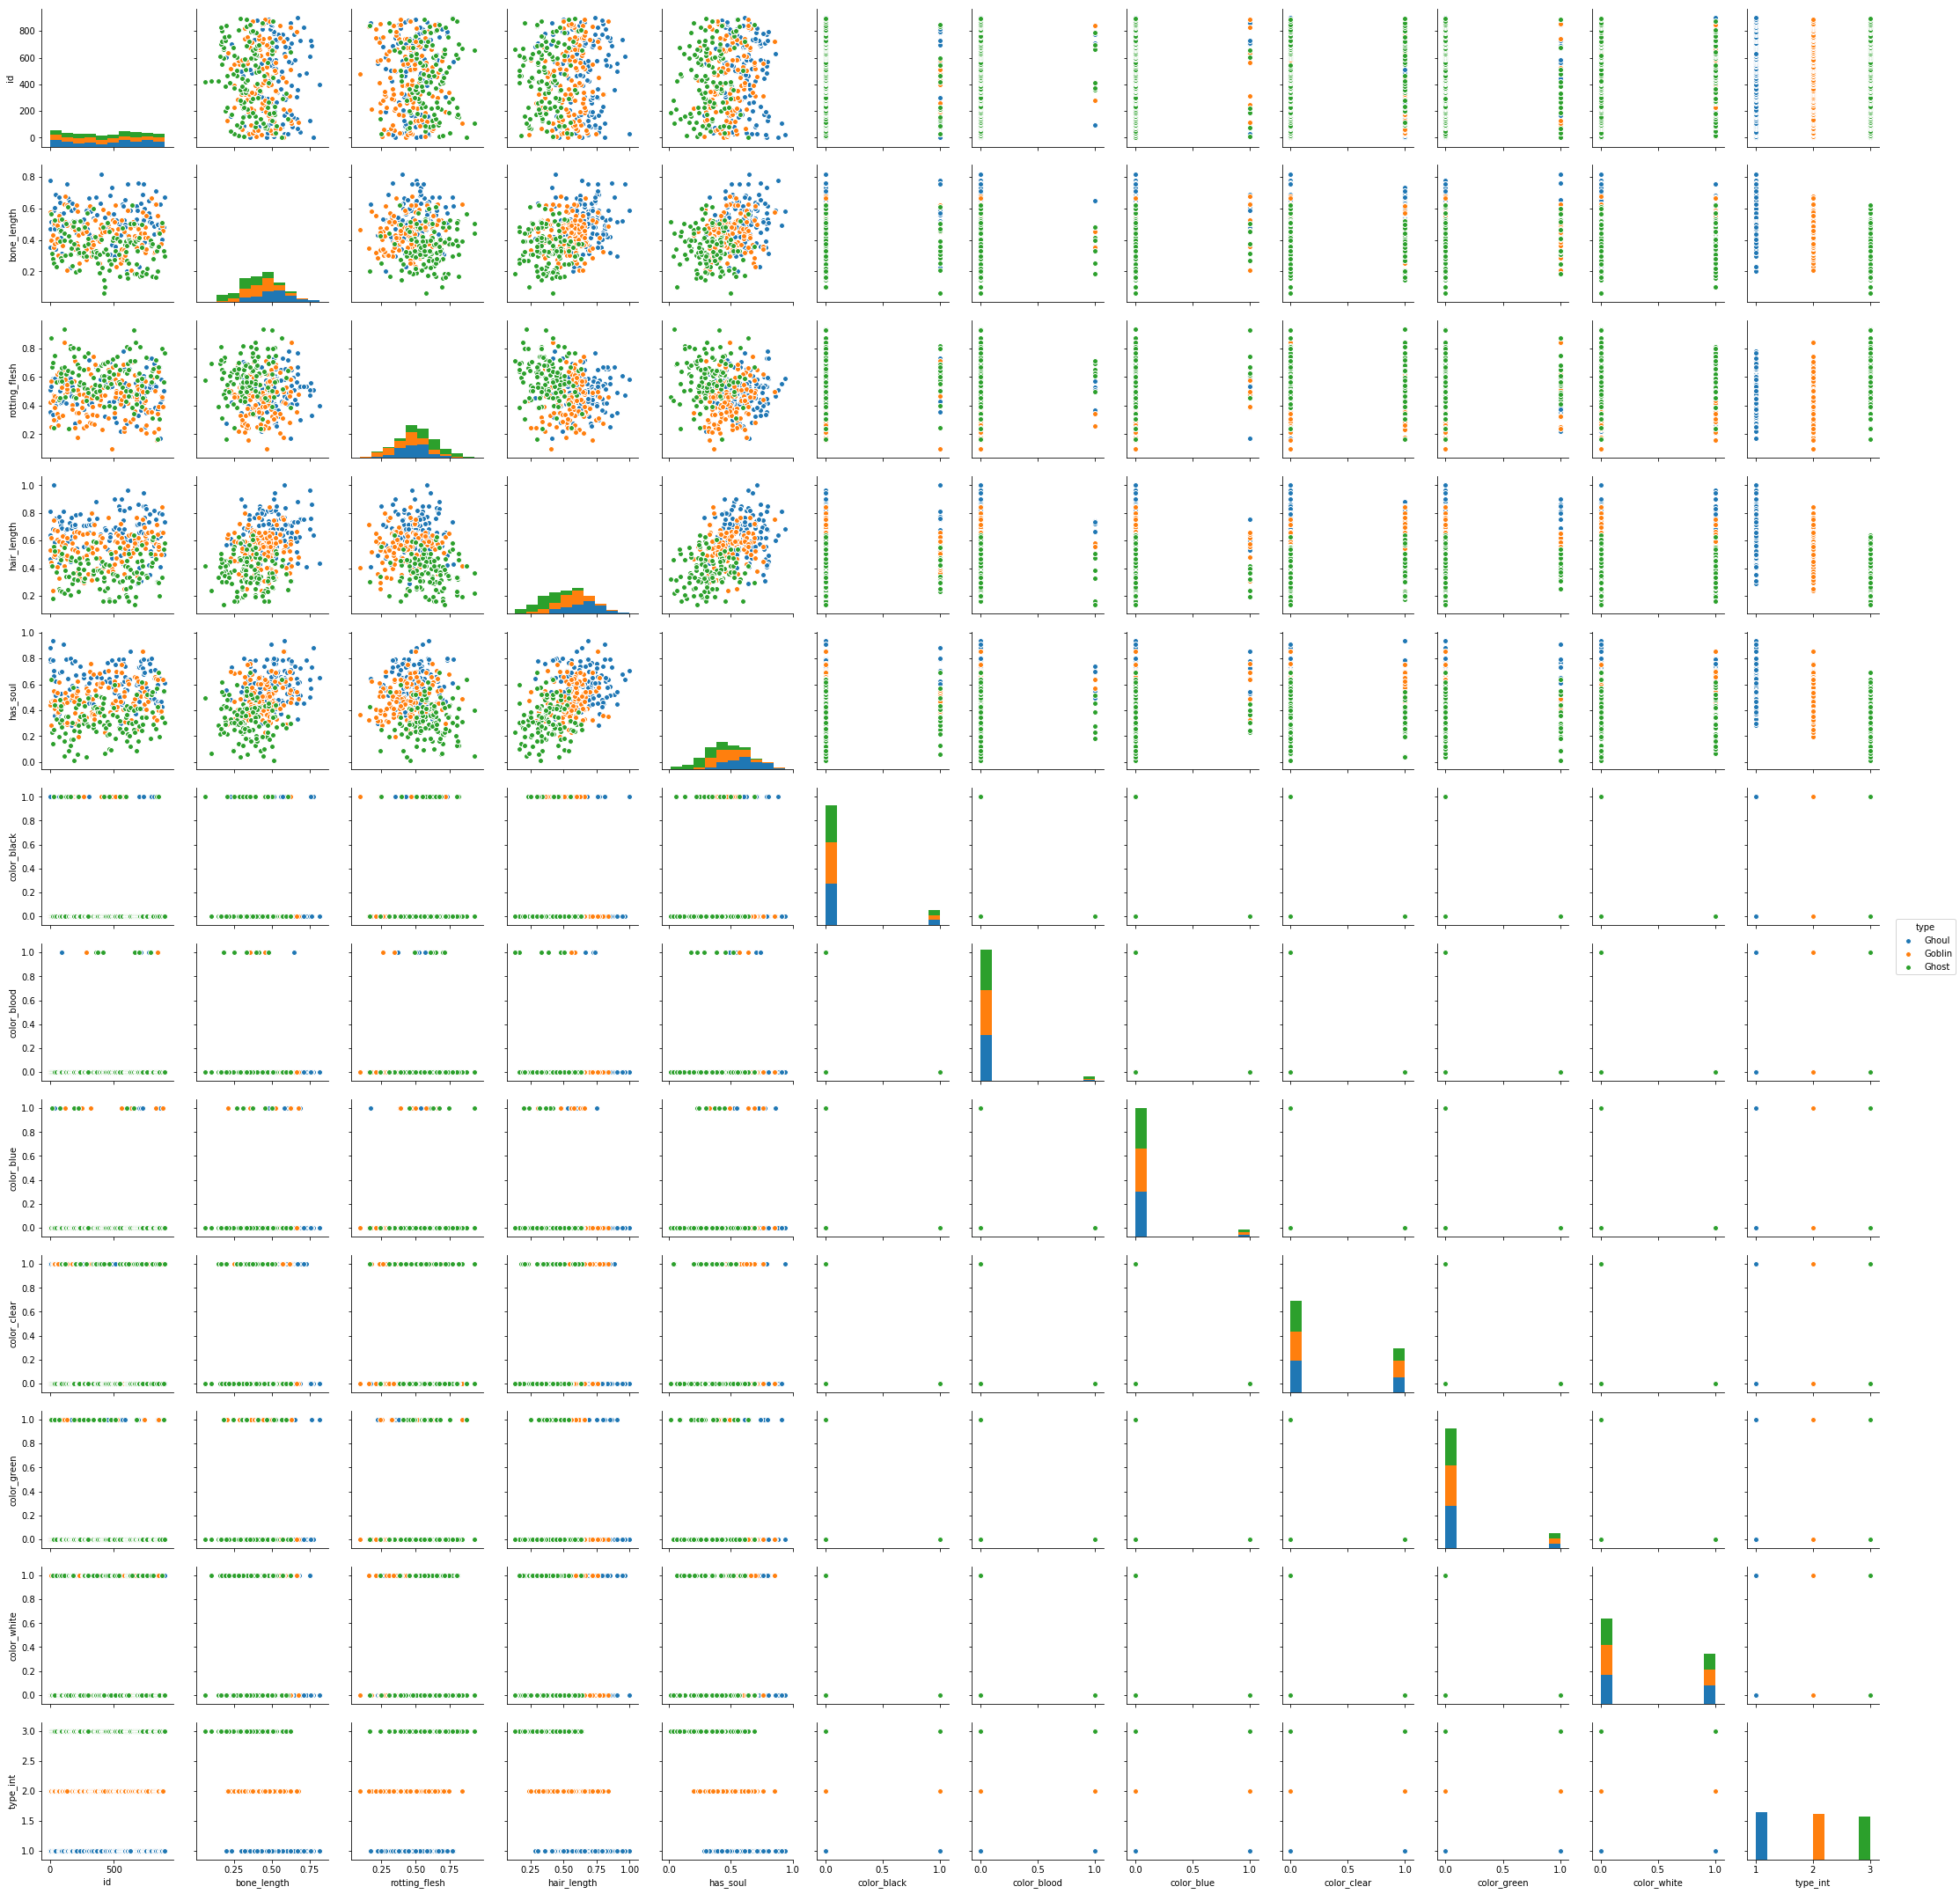

In [14]:
import seaborn as sns

sns.pairplot(df,hue = "type")

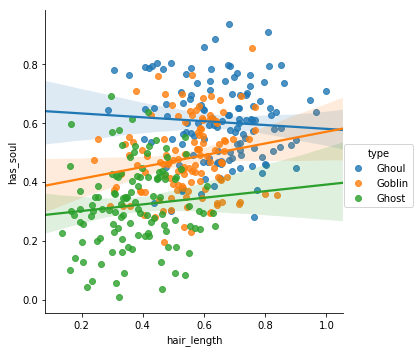

In [38]:
sns.lmplot(y = "has_soul",x = "hair_length",data=df,hue = 'type')

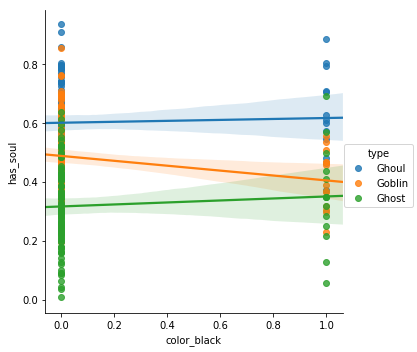

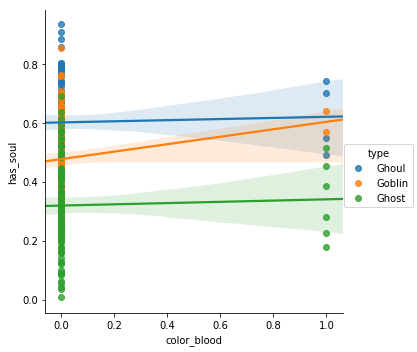

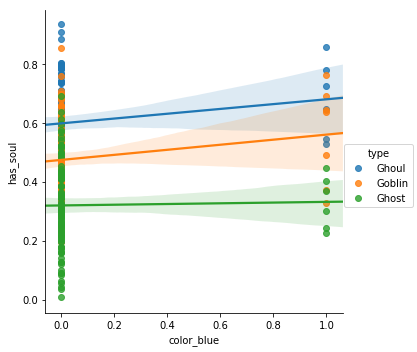

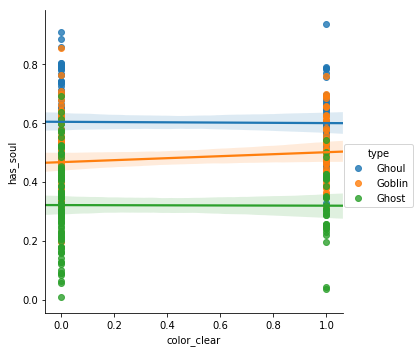

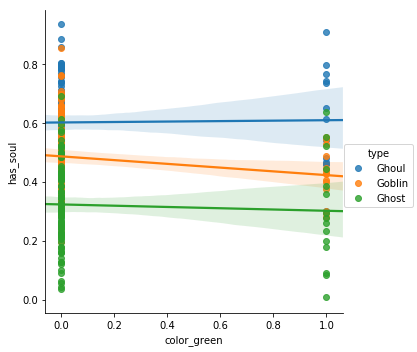

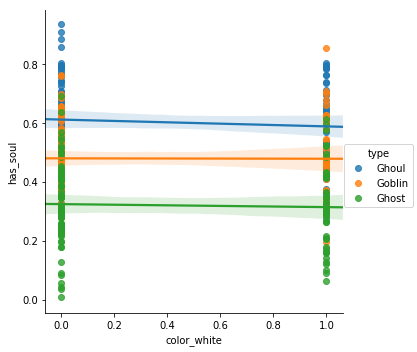

In [32]:
li = ['color_black', 'color_blood', 'color_blue', 'color_clear',
       'color_green', 'color_white']
for i in li:
    sns.lmplot(x = i, y= "has_soul",data=df,hue = 'type')

### Param tunning

In [85]:
dt_grid = {'max_depth' : list(range(6,12)), 'min_samples_split' : list(range(12,16)), 'criterion' : ['gini','entropy']}

In [86]:
dt= tree.DecisionTreeClassifier(random_state=0)

In [87]:
param_grid = model_selection.GridSearchCV(dt,dt_grid, cv=5)

In [88]:
X_train =df[[ 'bone_length', 'rotting_flesh', 'hair_length', 'has_soul',
       'color_black', 'color_blood', 'color_blue', 'color_clear',
       'color_green', 'color_white']]
Y_train = df['type_int']

In [89]:

param_grid.fit(X_train,Y_train)


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [6, 7, 8, 9, 10, 11], 'min_samples_split': [12, 13, 14, 15], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [90]:
print(param_grid.best_score_) #Best score
print(param_grid.best_params_)
print(param_grid.score(X_train, Y_train)) #Train score  #Evalution of tree

0.660377358490566
{'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 12}
0.8355795148247979


In [92]:
fi_df = pd.DataFrame({'feature': X_train.columns, 'importance' : param_grid.best_estimator_.feature_importances_ })

In [93]:
print(fi_df)

         feature  importance
0    bone_length    0.109372
1  rotting_flesh    0.194614
2    hair_length    0.406754
3       has_soul    0.275113
4    color_black    0.000000
5    color_blood    0.000000
6     color_blue    0.000000
7    color_clear    0.014146
8    color_green    0.000000
9    color_white    0.000000


In [94]:
df_test=pd.read_csv('test.csv')

In [95]:
#df_test = df_test.drop(['id'], 1)

In [96]:
df_test= pd.get_dummies(df_test,columns=['color'])

In [97]:
df_test.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color_black,color_blood,color_blue,color_clear,color_green,color_white
0,3,0.471774,0.387937,0.706087,0.698537,1,0,0,0,0,0
1,6,0.427332,0.645024,0.565558,0.451462,0,0,0,0,0,1
2,9,0.549602,0.491931,0.660387,0.449809,1,0,0,0,0,0
3,10,0.638095,0.682867,0.471409,0.356924,0,0,0,0,0,1
4,13,0.361762,0.583997,0.377256,0.276364,1,0,0,0,0,0


In [98]:
X_test =df_test[[ 'bone_length', 'rotting_flesh', 'hair_length', 'has_soul',
       'color_black', 'color_blood', 'color_blue', 'color_clear',
       'color_green', 'color_white']]

In [99]:
df_test['type_int']=param_grid.predict(X_test)

In [100]:
df_test.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color_black,color_blood,color_blue,color_clear,color_green,color_white,type_int
0,3,0.471774,0.387937,0.706087,0.698537,1,0,0,0,0,0,1
1,6,0.427332,0.645024,0.565558,0.451462,0,0,0,0,0,1,2
2,9,0.549602,0.491931,0.660387,0.449809,1,0,0,0,0,0,1
3,10,0.638095,0.682867,0.471409,0.356924,0,0,0,0,0,1,3
4,13,0.361762,0.583997,0.377256,0.276364,1,0,0,0,0,0,3


In [101]:
for i,row in df_test.iterrows():
    #print(i == 'Ghoul')
    #print(i)
    #print(row['type'])
    type_res=''
    if row['type_int'] == 1:
        type_res='Ghoul'
    elif row['type_int'] == 2:
        type_res='Goblin'
    else:
        type_res='Ghost'
    df_test.at[i,'type'] = type_res

In [102]:
df_test.to_csv("Submission_GGG_DT_parm_tunning.csv",columns=['id','type'],index=False)

## Accuracy = 0.65973